<h1 align="center">Graduate Rotational Internship Programme</h1>
<h2 align="center">The Sparks Foundation</h2>

<h3>Task #2: To Explore Supervised Machine Learning</h3>

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all the required libraries 

import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.shape

(25, 2)

In [4]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


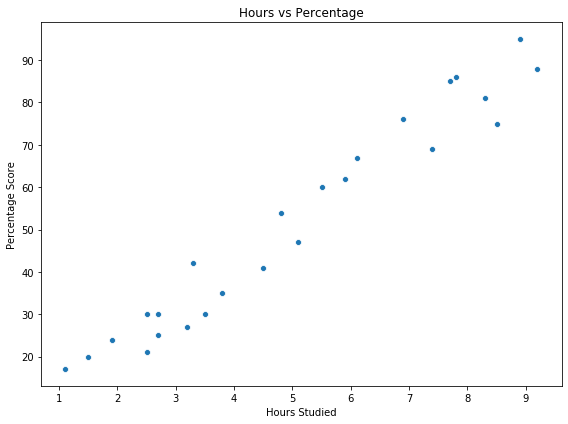

In [7]:
# Plotting the distribution of scores
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Percentage', fontsize=12) 
plt.xlabel('Hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)  
plt.tight_layout()

There is a positive linear relation between the 'number of hours studied' and 'percentage of score' obtained by the students

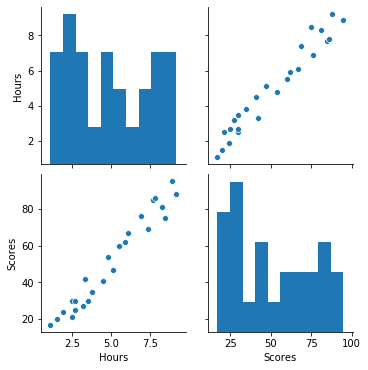

In [8]:
sns.pairplot(df)

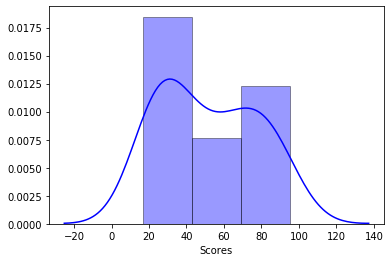

In [9]:
sns.distplot(df['Scores'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

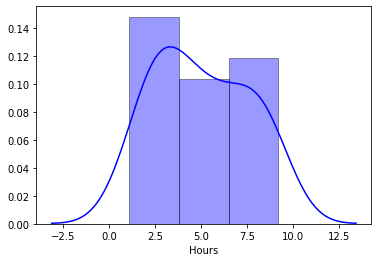

In [10]:
sns.distplot(df['Hours'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [11]:
#Displaying correlation among all the columns 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
# Setting variables

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [23]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

In [24]:
y_pred = lr.predict(X_test) # Predicting the scores

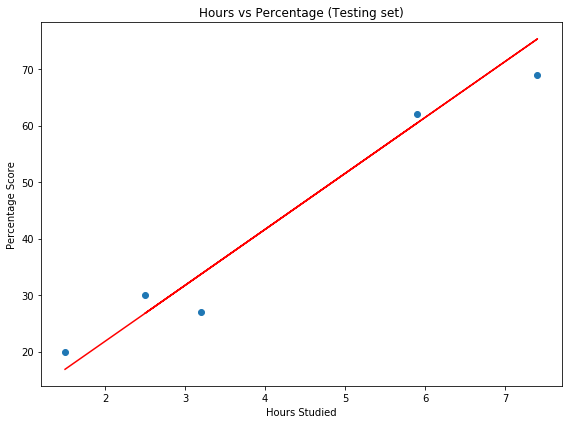

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

plt.title('Hours vs Percentage (Testing set)', fontsize=12) 
plt.xlabel('Hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)
plt.tight_layout()

In [26]:
#Displaying the Intercept
print(lr.intercept_)

2.018160041434683


In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665


In [28]:
hours = 9.25
own_pred = lr.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Using the above model, the predicted score for a student studying 9.25 hours a day is approximately 93.69

</br>

Additional steps using other packages and models

# Using PyCaret

In [29]:
from pycaret.regression import * 

In [30]:
reg1 = setup(df, target = 'Scores', session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(25, 2)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.8812,83.8705,9.1581,0.8343,0.1679,0.1849
1,7.1576,59.4003,7.7072,0.8827,0.1106,0.1107
2,3.4602,12.0136,3.4661,-0.9222,0.1219,0.1262
3,3.9618,17.5166,4.1853,0.5854,0.2550,0.1998
4,5.6228,32.0809,5.6640,0.8102,0.1912,0.2027
5,6.5880,52.6277,7.2545,0.1777,0.0909,0.0823
6,3.9414,15.5651,3.9453,0.9848,0.1305,0.1072
7,8.2614,68.2505,8.2614,nan,0.1135,0.1087
8,6.6371,44.0509,6.6371,nan,0.2127,0.2458
9,8.6049,74.0436,8.6049,nan,0.2233,0.2049


In [32]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.8812,83.8705,9.1581,0.8343,0.1679,0.1849
1,7.1576,59.4003,7.7072,0.8827,0.1106,0.1107
2,3.4602,12.0136,3.4661,-0.9222,0.1219,0.1262
3,3.9618,17.5166,4.1853,0.5854,0.2550,0.1998
4,5.6228,32.0809,5.6640,0.8102,0.1912,0.2027
5,6.5880,52.6277,7.2545,0.1777,0.0909,0.0823
6,3.9414,15.5651,3.9453,0.9848,0.1305,0.1072
7,8.2614,68.2505,8.2614,nan,0.1135,0.1087
8,6.6371,44.0509,6.6371,nan,0.2127,0.2458
9,8.6049,74.0436,8.6049,nan,0.2233,0.2049


In [33]:
final_lr = finalize_model(tuned_lr)

In [34]:
predict_model(final_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.8355,16.154,4.0192,0.9675,0.0855,0.0769


,Hours,Scores,Label
0,1.5,20,17.1474
1,4.8,54,49.4075
2,3.8,35,39.6317
3,6.1,67,62.1161
4,8.9,95,89.4883
5,8.3,81,83.6228
6,5.5,60,56.2506
7,5.9,62,60.1609


In [35]:
new = {'Hours': ['9.25']}

new_df = pd.DataFrame(new)

In [36]:
unseen_predictions = predict_model(final_lr, data=new_df)
unseen_predictions.head()

,Hours,Label
0,9.25,92.9099


Using the above model, the predicted score for a student studying 9.25 hours a day is approximately 92.9099

In [ ]:
# Adding more parameters and using other model other than Linear Regression

In [37]:
reg11 = setup(df, target = 'Scores', session_id = 123, silent = True,normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(25, 2)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [38]:
compare_models(blacklist=None, whitelist=None, fold=5,sort='R2', n_select=1, turbo=True, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Ridge Regression,5.4196,43.6390,6.0251,0.8755,0.1255,0.1205,0.0088
1,Bayesian Ridge,5.8188,45.9763,6.4863,0.8628,0.1315,0.1246,0.0094
2,Linear Regression,5.8602,46.5386,6.5351,0.8599,0.1324,0.1255,0.0040
3,Least Angle Regression,5.8602,46.5386,6.5351,0.8599,0.1324,0.1255,0.0050
4,Orthogonal Matching Pursuit,5.8602,46.5386,6.5351,0.8599,0.1324,0.1255,0.0058
5,Random Sample Consensus,5.8602,46.5386,6.5351,0.8599,0.1324,0.1255,0.0100
6,Huber Regressor,6.2302,53.5503,7.0346,0.8338,0.1393,0.1317,0.0102
7,TheilSen Regressor,6.3435,55.7066,7.2033,0.8139,0.1463,0.1357,0.0208
8,Random Forest,6.3727,57.9464,7.4360,0.6678,0.1809,0.1585,0.3584
9,K Neighbors Regressor,5.9860,60.9820,7.6878,0.6497,0.1834,0.1422,0.0068


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)

In [39]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.3812,60.0250,7.7476,0.8814,0.1362,0.1487
1,7.0104,78.5004,8.8600,0.8449,0.1121,0.0917
2,3.2171,10.4089,3.2263,-0.6654,0.1135,0.1188
3,1.3459,1.8425,1.3574,0.9564,0.0570,0.0598
4,4.4030,25.1439,5.0144,0.8512,0.1927,0.1833
5,6.4748,78.7088,8.8718,-0.2298,0.1115,0.0767
6,2.5351,7.8807,2.8073,0.9923,0.0484,0.0489
7,11.4327,130.7068,11.4327,nan,0.1607,0.1504
8,5.6267,31.6594,5.6267,nan,0.1831,0.2084
9,9.7188,94.4556,9.7188,nan,0.2562,0.2314


In [40]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.6740,89.9426,9.4838,0.8223,0.1488,0.1640
1,5.6302,38.5188,6.2064,0.9239,0.0858,0.0847
2,3.2511,10.7130,3.2731,-0.7141,0.1152,0.1205
3,1.1197,1.3098,1.1444,0.9690,0.0463,0.0486
4,4.5653,24.5531,4.9551,0.8547,0.1867,0.1826
5,6.3085,42.7677,6.5397,0.3318,0.0826,0.0805
6,5.3619,42.2266,6.4982,0.9588,0.0844,0.0866
7,8.0304,64.4871,8.0304,nan,0.1101,0.1057
8,5.7138,32.6476,5.7138,nan,0.1857,0.2116
9,8.8240,77.8634,8.8240,nan,0.2297,0.2101


In [41]:
final_ridge = finalize_model(tuned_ridge)

In [42]:
predict_model(final_ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge,4.222,23.3294,4.83,0.9531,0.0833,0 0.069905 dtype: float64


,Hours,0,Label
0,-1.505855,20.0,19.9686
1,-0.013188,54.0,46.8033
2,-0.439962,35.0,37.5009
3,0.498760,67.0,59.9329
4,1.491485,95.0,92.2836
5,1.287736,81.0,84.8459
6,0.268137,60.0,53.7402
7,0.422816,62.0,57.8420


In [43]:
unseen_predictions1 = predict_model(final_ridge, data=new_df)
unseen_predictions1.head()

,Hours,Label
0,9.25,96.7549


Using the above model, the predicted score for a student studying 9.25 hours a day is approximately 96.7549